<a href="https://colab.research.google.com/github/junawaneshivani/Pytorch/blob/master/nb6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
num_epochs = 4
batch_size = 100
learning_rate = 0.01

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
classes = ('t-shirt', 'trouser', 'pullover', 'dress', 'coat',
           'scandal', 'shirt', 'sneaker', 'bag', 'ankle boot')

torch.Size([100, 1, 28, 28])


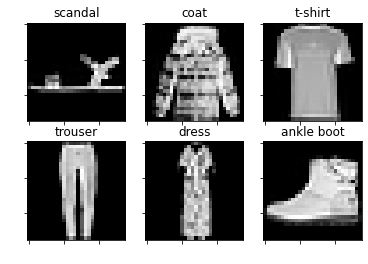

In [5]:
images, labels = next(iter(train_loader))
print(images.shape)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(classes[labels[i].item()])
    plt.xticks(color='w')
    plt.yticks(color='w')
plt.show()

In [6]:
 class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        # 1, 28, 28 -> 6, 24, 24 -> max_pool2d(kernel[2, 2]) -> 6, 12, 12
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
        
        # 6, 12, 12 -> 12, 8, 8 -> max_pool2d(kernel[2, 2]) -> 12, 4, 4
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4 , out_features=120)
        self.fc2 = nn.Linear(in_features=120 , out_features=60)
        self.out = nn.Linear(in_features=60 , out_features=10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)

        x = x.reshape(-1, 12 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        # no softmax because crosentropyloss function calculates it
        
        return x

In [7]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')
            
print("Finished Training")

Epoch [1/4], Step [100/600], Loss: 2.3009
Epoch [1/4], Step [200/600], Loss: 2.3005
Epoch [1/4], Step [300/600], Loss: 2.3001
Epoch [1/4], Step [400/600], Loss: 2.2889
Epoch [1/4], Step [500/600], Loss: 2.2910
Epoch [1/4], Step [600/600], Loss: 2.2757
Epoch [2/4], Step [100/600], Loss: 2.2584
Epoch [2/4], Step [200/600], Loss: 2.0651
Epoch [2/4], Step [300/600], Loss: 1.5029
Epoch [2/4], Step [400/600], Loss: 1.3025
Epoch [2/4], Step [500/600], Loss: 0.9796
Epoch [2/4], Step [600/600], Loss: 1.0996
Epoch [3/4], Step [100/600], Loss: 0.9891
Epoch [3/4], Step [200/600], Loss: 0.8545
Epoch [3/4], Step [300/600], Loss: 0.7902
Epoch [3/4], Step [400/600], Loss: 1.0712
Epoch [3/4], Step [500/600], Loss: 0.8515
Epoch [3/4], Step [600/600], Loss: 0.8236
Epoch [4/4], Step [100/600], Loss: 0.8112
Epoch [4/4], Step [200/600], Loss: 0.8347
Epoch [4/4], Step [300/600], Loss: 0.7001
Epoch [4/4], Step [400/600], Loss: 0.7787
Epoch [4/4], Step [500/600], Loss: 0.8603
Epoch [4/4], Step [600/600], Loss:

In [9]:
torch.save(model.state_dict(), './fashion_mnist_model.pth')

In [10]:
net = ConvNet()
net.load_state_dict(torch.load('./fashion_mnist_model.pth'))

<All keys matched successfully>

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}')



Accuracy of the network on the 10000 test images: 71.03
